# OpenCV

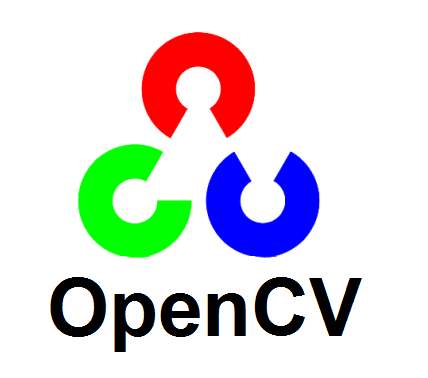

In [1]:
from IPython.core.display import Image 
Image('opencv.png')

## What is OpenCV?

OpenCV is

* open source
* computer vision
* built in C++

## Available interfaces

* C and C++
* Python ( **<-- today's focus**)
* Java

## OpenCV Basics

* Image representation and data structures

* Arithmetic image operations

* Histograms

* Image thresholding, smoothing, and edge detection

* Motion tracking (optical flow)

## 1 - Image representation and data structures

Images are stored as matrices using NumPy arrays.

In [2]:
import cv2
import numpy as np

img = cv2.imread('opencv.png')

## Images are arrays of 3-tuples

In [3]:
img.shape

(378, 428, 3)

## A pixel is a BGR value

* Access with slicing
* Values are (Blue, Green, Red)

In [4]:
# This is a pixel in the blue section.
img[250, 250]

array([255,   0,   0], dtype=uint8)

In [5]:
img[250:252, 250:252]

array([[[255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0]]], dtype=uint8)

## Loading images in grayscale

In [6]:
?cv2.IMREAD_GRAYSCALE

In [7]:
img_gray = cv2.imread('opencv.png', cv2.IMREAD_GRAYSCALE)
img_gray.shape

(378, 428)

In [8]:
img_gray[250, 250]

95

In [9]:
img_gray[:2, :2]

array([[255, 255],
       [255, 255]], dtype=uint8)

## More slicing

You also have access to all the array slicing you know and love from NumPy arrays.

Populating the interactive namespace from numpy and matplotlib


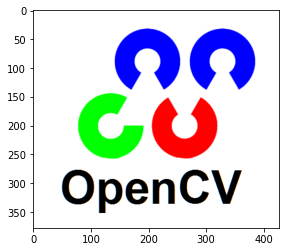

In [11]:
%pylab inline
icon = img[31:140, 140:260]
img[31:140, 270:390] = icon
imshow(img)

## Splitting the color channels - The CV way
You can split the color channels if you want to work with each individually (cell segmentation, etc).

In [12]:
b, g, r = cv2.split(img)

In [13]:
r

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [14]:
b

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
g

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
img = cv2.merge((b, g, r))
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Splitting the color channels - `numpy` slicing

Alternatively, in true NumPy fashion

In [17]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

## `numpy` is *fast*

* speed is an issue? $\rightarrow$ use `numpy` slicing
* `cv2.split` is slower.

## 2 - Arithmetic Image Operations

Images can be added and subtracted (just like NumPy arrays).

In [18]:
cat = cv2.imread('img/cat.jpg')
ducks = cv2.imread('img/ducks.jpg')
cat.shape, ducks.shape

((400, 600, 3), (400, 600, 3))

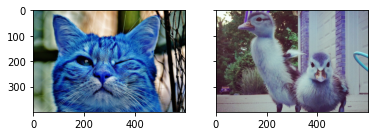

In [19]:
fig, ax = subplots(1, 2, sharey = True)
ax[0].imshow(cat)
ax[1].imshow(ducks)

## A blue cat?  WTH!?!

* `cv2` uses BGR
* `pylab` expects RGB
    * The usual standard

## Solution 1

Reverse the colors with slicing

In [20]:
BGR = cat[:1,:1]
RBG = cat[:1,:1, ::-1]
BGR, RBG

(array([[[ 63, 121, 120]]], dtype=uint8),
 array([[[120, 121,  63]]], dtype=uint8))

## Ahhhhh! That's better

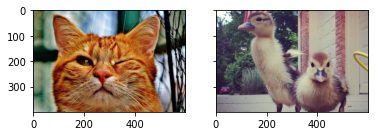

In [21]:
fig, ax = subplots(1, 2, sharey = True)
ax[0].imshow(cat[:,:, ::-1])
ax[1].imshow(ducks[:,:, ::-1])

# Colors are eight-bit integers

In [22]:
img.dtype, img_gray.dtype

(dtype('uint8'), dtype('uint8'))

In [23]:
tff = img_gray[:1, :1]
tff

array([[255]], dtype=uint8)

## Beware of overflow!

The largest possible 8-bit int is 255.

#### `255 + 1 == 0` OVERFLOW!

In [24]:
img_gray[:2, :2] + np.array([[1]], dtype=np.uint8)

array([[0, 0],
       [0, 0]], dtype=uint8)

## Use `cv.add` to avoid overflow

* images are of type `uint8`
* the maximum value is `255`
* `cv2.add` stops overflow

In [25]:
x = np.uint8([250])
y = np.uint8([10])
overflow = x + y
better = cv2.add(x, y)
overflow, better

(array([4], dtype=uint8), array([[255]], dtype=uint8))

## Adding images

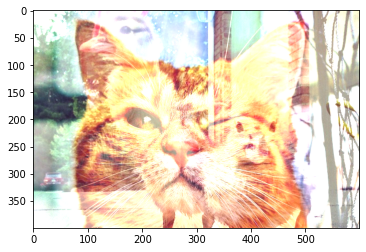

In [26]:
res = cv2.add(cat, ducks)
imshow(res[:,:,::-1])

## Weighted average

Blend images with a weighted combination

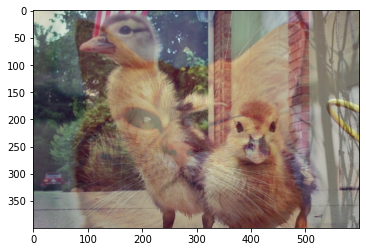

In [27]:
res = cv2.addWeighted(cat, 0.3, ducks, 0.7, 0)
imshow(res[:,:,::-1])

## 3 - Histograms

* Learn the distribution of intensities in an image
* Locate objects
* Segment images
* Enhance contrast
* ...

## 3 - Histograms

Let's load up our cat image from before.

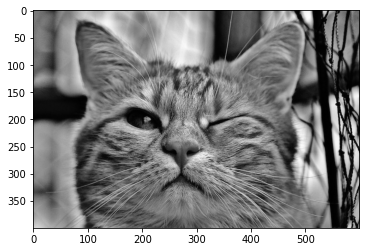

In [28]:
cat_gray = cv2.imread('img/cat.jpg', cv2.IMREAD_GRAYSCALE)

import matplotlib.cm as cm
imshow(cat_gray, cmap = cm.gray)

Computing image histograms in OpenCV

In [29]:
hist_edges = cv2.calcHist([cat], [0], None, [256], [0, 256])

Computing image histograms in NumPy

In [30]:
hist_edges, bins = np.histogram(cat.ravel(), 256, [0, 256])

## Important differences

* The `cv2` is faster `numpy`.
* The `np.hist` **257** elements 
    * each bin computed as 0-0.99, 1-1.99, etc.
* OpenCV has only **256**. 
    * This is important for plotting.
* NumPy has another method, `bincount`, which is faster than `histogram`.

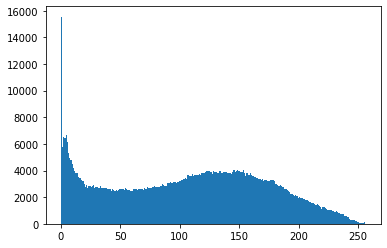

In [31]:
_ = hist(cat.ravel(), 256, [0, 256])

## 3 - Histograms

*Equalization* is an important concept in the context of image histograms.

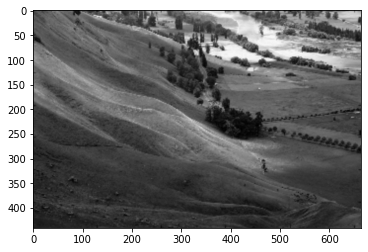

In [32]:
img = cv2.imread('img/wiki.png', cv2.IMREAD_GRAYSCALE)
imshow(img, cmap = cm.gray)

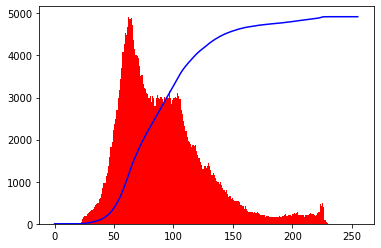

In [33]:
edges, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

_ = plot(cdf_norm, color = 'b')
_ = hist(img.ravel(), 256, [0, 256], color = 'r')

Equalization smooths out the CDF of the image histogram, making it as close to a straight line as possible. This has the effect of improving the image contrast.

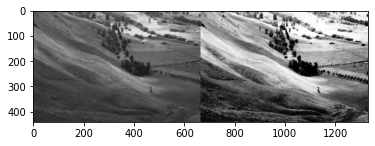

In [34]:
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
imshow(res, cmap = cm.gray)

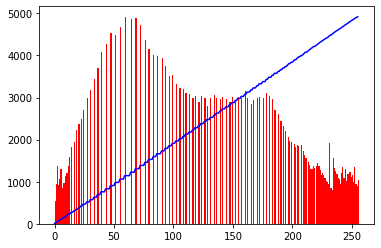

In [35]:
edges, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

_ = plot(cdf_norm, color = 'b')
_ = hist(equ.ravel(), 256, [0, 256], color = 'r')

**ASSIGNMENT!** Implement histogram equalization *without* the help of `equalizeHist`. (Hint: create a lookup table for the CDF, mapping the original bins to the equalized ones, so you can do something similar to `equalized_image = cdf[original_image]`)

## 4 - Image thresholding, smoothing, and edge detection

OpenCV has several thresholding methods built in.

* `cv2.THRESH_BINARY`
* `cv2.THRESH_BINARY_INV`
* `cv2.THRESH_TRUNC`
* `cv2.THRESH_TOZERO`
* `cv2.THRESH_TOZERO_INV`

These are tailored specifically to hard pixel values (that is, *not* adaptive).

In [36]:
from composable import pipeable
from composable.utility import dir_
from composable.strict import filter
from composable import operator as op

contains = pipeable(lambda sub, s: sub in s)
startswith = pipeable(lambda sub, s: s.startswith(sub))

ModuleNotFoundError: No module named 'composable'

In [ ]:
(cv2
>> pipeable(dir)
>> filter(contains('GRAY'))
)

In [ ]:
(cv2
>> pipeable(dir)
>> filter(startswith('THRESH'))
)

In [ ]:
img = cv2.imread('img/gradients.jpg', cv2.IMREAD_GRAYSCALE)
imshow(img, cmap = cm.gray)

In [ ]:
ret, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, t1, t2, t3, t4, t5]

for i in range(6):
    subplot(2, 3, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

## 4 - Image thresholding, smoothing, and edge detection

### Thresholding

OpenCV also has two *adaptive* thresholding methods.

* `cv2.ADAPTIVE_THRESH_MEAN_C`
* `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`

`THRESH_MEAN` is the mean of a neighborhood area, while `THRESH_GAUSSIAN` is the weighted sum of a neighborhood according to a gaussian window.

In [ ]:
img = cv2.imread('opencv.png', cv2.IMREAD_GRAYSCALE)
imshow(img, cmap = cm.gray)

In [ ]:
ret, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
t2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
t3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'BINARY', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, t1, t2, t3]

for i in range(4):
    subplot(2, 2, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

### Smoothing

Smoothing is a useful preprocessing step (prior to segmentation or thresholding) or to simply suppress spurious pixel noise.

Smoothing relies on a *kernel*, or filter, that specifies how the smoothing is done.

In [ ]:
cats = cv2.imread('cats1.jpg')
kernel = np.ones((5, 5), np.float32) / 25

# Average smoothing: takes the average of all pixels under the filter
dst = cv2.filter2D(cats, -1, kernel)

subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Averaging')

In [ ]:
# Gaussian filter: averages each pixel under a filter, weighted by a gaussian
dst = cv2.GaussianBlur(cats, (5, 5), 0)
subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Gaussian')

In [ ]:
# Median filter: takes the median value under the filter
dst = cv2.medianBlur(cats, 5)
subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Median')

### Edge Detection

* Useful for image segmentation
* Often done after smoothing

In [ ]:
img = cv2.imread('cats2.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']
images = [img, laplacian, sobelx, sobely]

for i in range(4):
    subplot(2, 2, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

Canny edge detection is the most popular method for finding edges in an image. It operates by using a *dual threshold* and then connects the edges into an edge map.

In [ ]:
img = cv2.imread('opencv.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)

subplot(121)
imshow(img, cmap = cm.gray)
title('Original')
xticks([])
yticks([])

subplot(122)
imshow(edges, cmap = cm.gray)
title('Canny Edge Map')
xticks([])
yticks([])

## 5 - Optical flow

Optical flow refers to tracking motion in videos.

1. Stand a pixel at a certain frame (or time *t*).
2. In the next frame (or time point *t + 1*), find where the pixel "moved".
3. Draw a vector connecting the two.
4. Repeat for each pixel, for each pair of frames.

In [ ]:
# Image courtesy of Wikipedia's article on optical flow.
# http://en.wikipedia.org/wiki/Optical_flow

from IPython.core.display import Image 
Image('opticalflow.png') 

Optical flow is important in many areas of video analysis.

* Video compression (sparse vs dense optical flow)
* Video stabilization
* Finding structure from motion (**<-- my research!**)

## 5 - Optical flow

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plot
import matplotlib.cm as cm

fig = figure()

video = cv2.VideoCapture('normal.avi')
num_frames = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))

i = 0
frames = np.zeros(shape = (num_frames, height, width))
sequence = []
while video.grab() and i < num_frames:
    flag, f = video.retrieve()
    if not flag:
        quit('Failed to extract frame.')
    frame = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    frames[i, :, :] = frame
    sequence.append([imshow(frame, cmap = cm.gray)])
    i += 1
anim = animation.ArtistAnimation(fig, sequence, interval = 200, blit = True, repeat = True)
video.release()

From the frames of the video, we can compute optical flow by operating on pairs of frames.

In [ ]:
sequence = []
fig = plot.figure()
for i in range(1, frames.shape[0]):
    prev = frames[i - 1]
    curr = frames[i]
    
    opt = cv2.calcOpticalFlowFarneback(prev, curr, 0.5, 2, 32, 4, 5, 1.1, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
    x = opt[:, :, 0]
    y = opt[:, :, 1]
    sequence.append([quiver(x[::3, ::3], y[::3, ::3])])
anim = animation.ArtistAnimation(fig, sequence, interval = 200, blit = True, repeat = True)

## Conclusion

There are many OpenCV alternatives in the wild.

* mahotas
* scikit-image
* simplecv
* ???

Each has its own strengths (scikit-image natively uses NumPy / SciPy for basic image operations; mahotas good for scientific computing), but OpenCV has significantly greater breadth.

# Thank you!